#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 4
#### Topics:
- ANOVA


#### Due: 10/05/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


**Name**: Eyal Michaeli

**Student ID**: 207380528

**Date**: 10.05.22

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

# Problem 1 (Solving LS using SVD)
Consider the housing prices dataset (``housing_prices.csv``). Use houses of lot size smaller than 15000 ft.

1. Find the least squares coefficient of the linear model with target variable ``SalePrice`` and the 16 predictors:
``['LotArea',  'YearBuilt',
  'GarageCars', 'YrSold', 'MoSold', 'Fireplaces',
  'HalfBath', 'LowQualFinSF', 'TotalBsmtSF',
  '1stFlrSF', 'LotFrontage', 'ScreenPorch',
   'WoodDeckSF', 'OverallCond', 'BsmtUnfSF']`` 
plus a constant term. Remove all entries in which one or more of these predictors is missing. 

You can use the code below to read and arrange the data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import pandas as pd
import numpy as np

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.style.use('seaborn')
sns.set(font_scale=1.4)

In [2]:

target = 'SalePrice' 
lo_predictors = ['const', 'SalePrice', 'LotArea',  'YearBuilt',
    'GarageCars', 'YrSold', 'MoSold', 'Fireplaces',
    'HalfBath', 'LowQualFinSF', 'TotalBsmtSF',
    '1stFlrSF', 'LotFrontage', 'ScreenPorch',
     'WoodDeckSF', 'OverallCond', 'BsmtUnfSF']

data = pd.read_csv("housing_prices.csv")
data = data[data.LotArea < 15000]  # we focus on small lots
data['const'] = 1                  # add constant term
data = data.filter(lo_predictors).dropna() # remove all other columns

y = data[target].values
X = data.drop(target, axis=1)
Z = X.values
n, p = Z.shape

 - By inverting the matrix $Z^\top Z$. Denote the solution $\hat{\beta}$.
 

In [3]:
A = np.dot(np.linalg.inv(np.dot(Z.T,Z)), Z.T)

betas_hat_regular = np.dot(A, y)

print( ''.join([f"B{i} = {beta_value:.2f}\n" for i, beta_value in enumerate(betas_hat_regular)]))


B0 = -3039719.75
B1 = 2.98
B2 = 616.84
B3 = 21256.55
B4 = 884.95
B5 = 983.79
B6 = 16763.36
B7 = 27915.65
B8 = 68.96
B9 = 43.90
B10 = 41.28
B11 = 0.73
B12 = 22.67
B13 = 30.83
B14 = 7715.94
B15 = -8.10



 - Using the SVD method. Here, decide that $\sigma_i > 0$ if $\sigma_i / \sigma_1 > 10^{-6}$. Denote the solution $\hat{\beta}^{SVD}$.
 

In [4]:
EPSILON = 10 ** -6

u, sigma, v_t = np.linalg.svd(Z)

sigma_larger_than_epsilon_indices = (sigma / sigma[0] > EPSILON)

y_star = u.T @ y
y_star_p = y_star[: p]

betas_star = np.zeros(p)
betas_star[sigma_larger_than_epsilon_indices] = y_star_p[sigma_larger_than_epsilon_indices] / sigma[sigma_larger_than_epsilon_indices]

v = v_t.T
betas_hat_svd = v @ betas_star

print( ''.join([f"B{i} = {beta_value:.2f}\n" for i, beta_value in enumerate(betas_hat_svd)]))

B0 = -0.27
B1 = 2.94
B2 = 612.37
B3 = 21197.77
B4 = -624.39
B5 = 866.65
B6 = 16647.23
B7 = 28030.11
B8 = 68.07
B9 = 44.10
B10 = 41.41
B11 = 6.73
B12 = 23.27
B13 = 31.80
B14 = 7708.39
B15 = -8.18



 - In which method $R^2$ is smaller?
 

In [5]:
def get_R2(y, Z, beta_hat):
    y_hat = Z @ beta_hat
    y_mean = np.mean(y)
    ss_fit = np.sum((y_hat - y_mean)**2)
    ss_tot = np.sum((y - y_mean)**2)
    return ss_fit / ss_tot

In [6]:
print(f"R^2 with regular computation = {get_R2(y, Z, betas_hat_regular):.6f}\nR^2 with SVD computation = {get_R2(y, Z, betas_hat_svd):.6f}")


R^2 with regular computation = 0.745206
R^2 with SVD computation = 0.744431


In [7]:
smaller = "SVD" if get_R2(y, Z, betas_hat_regular) > get_R2(y, Z, betas_hat_svd) else "regular"
print(f"It seems that {smaller} computing of LS has a smaller R^2")

It seems that SVD computing of LS has a smaller R^2


2. Plot $\hat{y}$ and $\hat{y}^{SVD}$ over the same pannel to convince yourself that both methods resulted in similar fitted responses. 

In [8]:
# first compute y hat
y_hat_regular = Z @ betas_hat_regular
y_hat_svd = Z @ betas_hat_svd

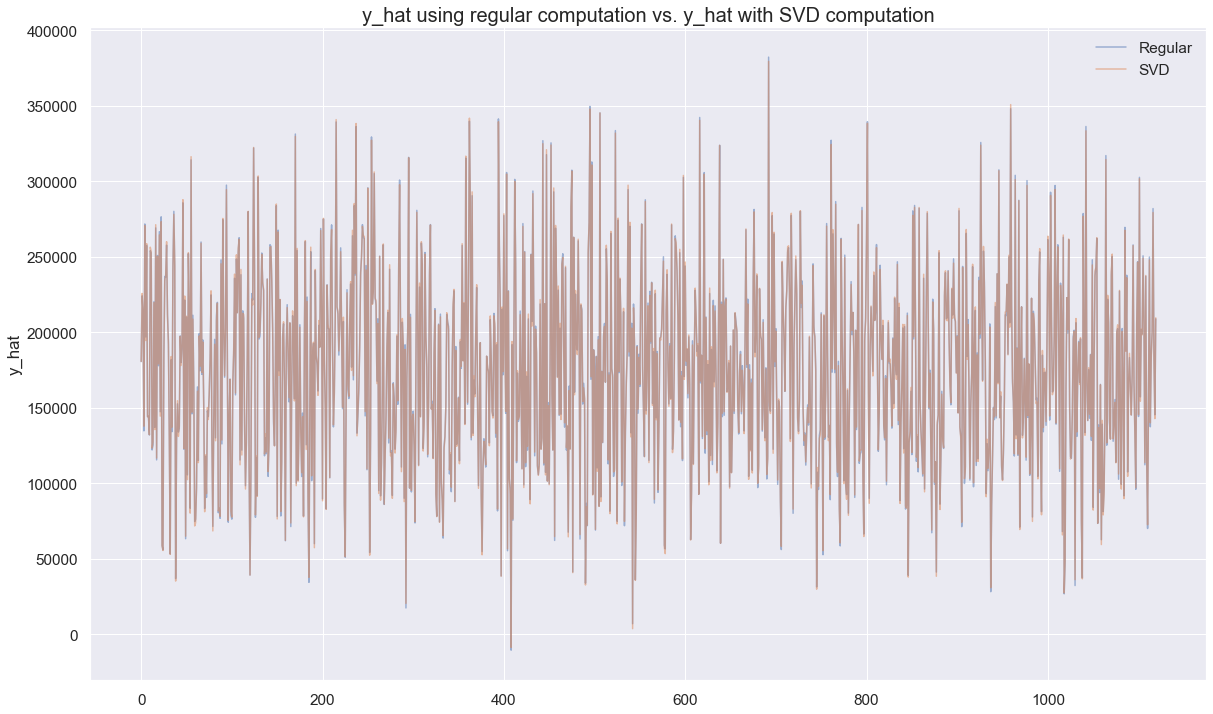

In [9]:
# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))
plt.plot(y_hat_regular, alpha=0.5, label="Regular")
plt.plot(y_hat_svd, alpha=0.5, label="SVD")
plt.title(r"y_hat using regular computation vs. y_hat with SVD computation", fontsize=20)
ax.set_ylabel("y_hat")
ax.legend()
plt.show()

3. Plot $\log(|\hat{\beta}_i/\hat{\beta}^{SVD}_i|)$ vs. $i$ for $i=1,\ldots,p$ and indicate the covariate whose coefficient exhibits the largest difference between the methods.

The point: When there are many predictors, it is likely that $Z$ will be rank deficient in the sense that some of its singular values are very small. Removing those singular values is usually a good practice; it is important to observe how this removal affects the solution. 

The largest difference is for the first predictor, which is the constant covariate. We can check that this result makes sense by fiting a new model without the constant covaraite and test whether the residuals in the smaller new model are not significantly different than those in the original model. 

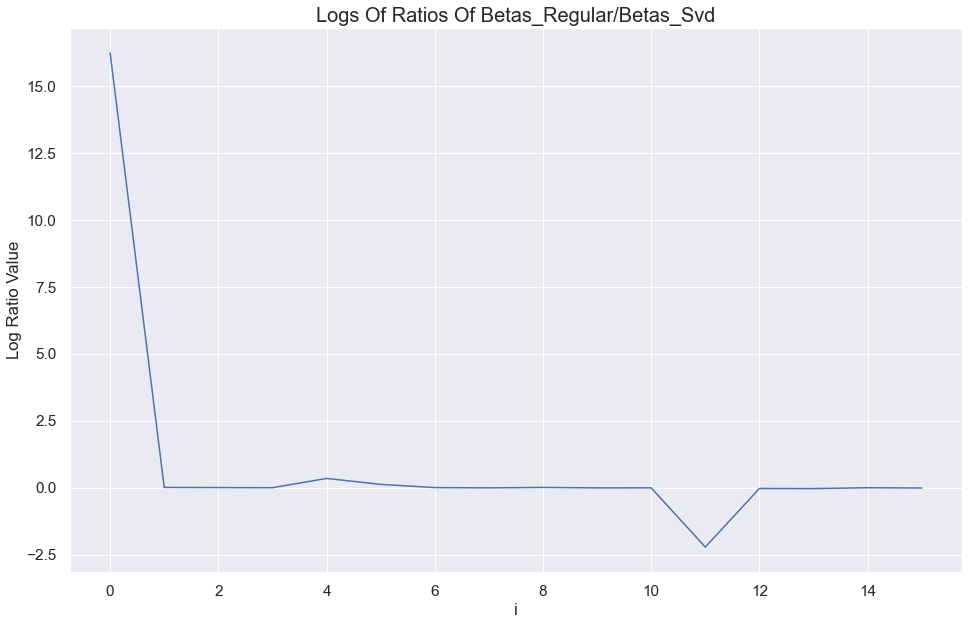

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))

logs_ratios = list()
for beta_hat_regular, beta_hat_svd in zip(betas_hat_regular, betas_hat_svd):
    logs_ratios.append(np.log(abs(beta_hat_regular / beta_hat_svd)))
    
sns.lineplot(x=range(len(logs_ratios)), y=logs_ratios)
plt.xlabel("i")
plt.ylabel(r"Log Ratio Value")
plt.title("Logs of ratios of betas_regular/betas_svd".title(), fontsize=20)
plt.show()

## Problem 2 ($t$-test is a kind of ANOVA)
Consider the following two-sample problem. The data is
$$
y_{ij} = \mu_j + \epsilon_{ij},\qquad j=1,\ldots,n_i,\quad i=0,1. 
$$

1. Find the statistic $t$ for the two-sample $t$ test (using of the observable varaibles)


Let us define 
$$
s^2 = \frac {\sum_{j=1}^{n_1}(y_{1j}-\mu_1)^2 + \sum_{j=1}^{n_0}(y_{0j}-\mu_0)^2 } {n_0+n_1-2} 
$$

And, 

$$ 
t = \frac{\mu_0 - \mu_1}{\sqrt{\frac{s^2}{n_0} + \frac{s^2}{n_1}}}
$$


2. Write the ANOVA table for $k=2$ and find the F statistic $F$ (using of the observable varaibles)

Anova table, for $K = 2$:
<br>

| Source | DoF | SS | MS | F |
| :- | -: | :-: | :- | -: |
| Groups | 1 | $SS_{between} = \sum_{i=0}^{1}{n_i(\mu_i - \bar{y})^2}$ | $\frac{SS_{bet}}{1}$ | $\frac{MS_{bet}}{MS_{wit}}$ |  
| Error | n - 2 | $SS_{within} = \sum_{i=0}^{1} \sum{j=1}^{n_i} ({y_{i,j} - \mu_i)^2}$ | $\frac{SS_wit}{n-2}$| |
| Total | n - 1 | $SS_total = \sum{i=0}^{1} \sum{j=1}^{n_1} (y_{i,k} - \hat{y})^2)$| | | 

3. Conclude that $t^2 = F$. 

Recall that:

$$ F = \frac{MS_{between}}{MS_{within}} = \frac{\frac{SS_{between}}{k-1}}{\frac{SS_{within}}{n-k}}$$ 

And that:

$ \bar{y} = \frac{n_0 \mu_0+ n_1 \mu_1}{n_0 + n_1} $

Let's start with $MS_{between}$:
$$ \frac{SS_{between}}{2-1} = SS_{between} = n_0(\mu_0 - \bar{y})^2 + n_1(\mu_1 - \bar{y})^2$$

--> plug in $\bar{y}$, and arrange the inner expression a bit:

$$
n_0(\mu_0 - \bar{y})^2 = n_0 (\mu_0 - \frac{n_0 \mu_0+ n_1 \mu_1}{n})^2 = n_0(\frac{n_1 \mu_0 - n_1 \mu_1}{n})^2 = \frac{n_0n_1^2}{n^2}(\mu_0 - \mu_1)^2
$$

And, because the expression is symmetric:
$$
n_1(\mu_1 - \bar{y})^2 = \frac{n_1n_0^2}{n^2}(\mu_1 - \mu_0)^2
$$

--> continue with $SS_{between}$

$$
SS_{between} = \frac{n_0n_1^2}{n^2}(\mu_0 - \mu_1)^2 + \frac{n_1n_0^2}{n^2}(\mu_1 - \mu_0)^2
$$

Since squaring an expression doesn't mind negative/positive:

$$
= (\frac{n_0 n_1 ^2 + n_1 n_0^2}{n^2}) (\mu_0 - \mu_1)^2
$$

$$
= \frac {n_0 n_1}{n} (\mu_0 - \mu_1)^2 = \frac{1}{\frac{n}{n_0 n_1}} (\mu_0 - \mu_1)^2 = \frac{(\mu_0 - \mu_1)^2}{\frac{1}{n_0} + \frac {1}{n_1}} 
$$

Now, for the $MS_{within}$:

$$
{\frac{SS_{within}}{n-2}} = \frac{\sum_{j=1}^{n_0}(y_{0j} - \bar{y_0})^2  + \sum_{j=1}^{n_1}(y_{1j} - \bar{y_1})^2}{n_0 + n_1 - 2}
$$

We know that:
$$
s^2 = \frac {\sum_{j=1}^{n_1}(y_{1j}-\mu_1)^2 + \sum_{j=1}^{n_0}(y_{0j}-\mu_0)^2 } {n_0+n_1-2} 
$$

And, 

$$ 
t = \frac{\mu_1 - \mu_0}{\sqrt{\frac{s^2}{n_0} + \frac{s^2}{n_1}}}
$$

-->

$$
t^2 = \frac{(\mu_1 - \mu_0)^2}{s^2 (\frac{1}{n_1} + \frac{1}{n_0})} = (\mu_1 - \mu_0)^2 \frac{n_0 n_1}{n_0 + n_1} \frac{1}{s^2} 
$$

$$
= \frac{n_0 n_1}{n_0 + n_1} \cdot (\mu_1 - \mu_0)^2 \frac{n_0+n_1-2}{\sum_{i=1}^{n_1}(y_{1i}-\mu_1)^2 + \sum_{i=1}^{n_0}(y_{0i}-\mu_0)^2 }
$$

SO, 
$$ {\frac{SS_{within}}{n-2}} = s^2 $$


$$
F = \frac{SS_{between}}{\frac{SS_{within}}{n-2}} = t^2
$$

DONE.

4. Does the test that rejects when $|t| > t_{n-1}^{1-\alpha/2}$ has larger power than the test that rejects when $F > F_{1,n-1}^{1-\alpha}$ ? less? same? 

We know that:
$$
P(F > F_{1,n-1}^{1-\alpha}) 
$$

$$
= P(t^2 > F_{1,n-1}^{1-\alpha}) 
$$

$$ 
= P(|t| > \sqrt{F_{1,n-1}^{1-\alpha}})
$$

And that:

$$
P(|t| > t_{n-1}^{1-\frac{\alpha}{2}}) = \alpha
$$

-->

$$
P(t^2 > (t_{n-1}^{1-\frac{\alpha}{2}})^2) = \alpha
$$  


And thanks to the last question, we know that $F = t^2$:  
$$
P(F_{1, n-1} > (t_{n-1}^{1-\frac{\alpha}{2}})^2) = \alpha
$$ 

-->

$$
P(F_{1,n-1} > F_{1,n-1}^{1-\alpha}) = \alpha
$$

-->

$$
F_{1, n-1}^{1-\alpha} = (t_{n-1}^{1-\frac{\alpha}{2}})^2
$$  

-->
$$
\sqrt{F_{1,n-1}^{1-\alpha}} = t_{n-1}^{1-\frac{\alpha}{2}}
$$ 

-->

$$
P(F > F_{1,n-1}^{1-\alpha}) = P(|t| > \sqrt{F_{1,n-1}^{1-\alpha}}) = P(|t| > t_{n-1}^{1-\frac{\alpha}{2}})
$$

By that we prooved that the 2 tests are basically the same and have the same power, $\beta$.

## Problem 3 (ANOVA Decomposition)
In class, we considered the decomposition:
$$
\begin{equation}
\mathrm{SS}_{tot} = \mathrm{SS}_{within} + \mathrm{SS}_{between}
\label{eq:ANOVA} \tag{1}
\end{equation}
$$
where
$$
\mathrm{SS}_{between} = \sum_{i=1}^k n_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2,\qquad \mathrm{SS}_{within} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2
$$
Prove $\eqref{eq:ANOVA}$ by expanding:
$$
\mathrm{SS}_{tot} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{\cdot \cdot})^2 = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot} + \bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 = ...
$$

## Solution

$$
SS_{tot} = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (y_{ij} - \bar{y_i} + \bar{y_i} - \bar{y})^2
$$

(We'll treat that as $(a + b)^2 = a^2 + b^2 + 2ab$ formula) -->

$$
= \sum_{i=1}^{k} \sum_{j=1}^{n_i} (y_{ij} - \bar{y_i})^2 + (\bar{y_i} - \bar{y})^2 + 2(y_{ij} - \bar{y_i})(\bar{y_i} - \bar{y})
$$

-->

$$
\sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2 + \sum_{i=1}^k \sum_{j=1}^{n_i}(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 + 2\sum_{i=1}^k \sum_{j=1}^{n_i} (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})(y_{ij} - \bar{y}_{i\cdot})
$$

-->

$$ 
SS_{within} + SS_{between} + 2\sum_{i=1}^k \sum_{j=1}^{n_i} (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})(y_{ij} - \bar{y}_{i\cdot}) 
$$


$$ 
= SS_{within} + SS_{between} + 2\sum_{i=1}^k \sum_{j=1}^{n_i} (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})(y_{ij} - \bar{y}_{i\cdot})
$$

-->

$$
= SS_{within} + SS_{between} + 2 \sum_{i=1}^k (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot}) \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})
$$
 
$$
= SS_{within} + SS_{between} + 2 (\sum_{i=1}^k (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot}) \sum_{j=1}^{n_i} (y_{ij}) - n\bar{y}_{i\cdot})
$$


Note: we know that $\sum_{j=1}^{n_i} (y_{ij}) = n\bar{y}_{i\cdot}$, so:
Keep going -->

$$
SS_{tot} = SS_{within} + SS_{between} + 2 \sum_{i=1}^k (\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot}) \cdot 0 = SS_{within} + SS_{between}
$$

DONE.

## Problem 4 (ANOVA and multiple testing in Practice)

Consider Israeli wines in the wine dataset ``winemag-data_first150k.csv`` used in class (downloaded from Kaggle https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data_first150k.csv). Use ANOVA to measure the effect of winary (``winary``) on the quality (``points``) of wine of veriaty ``Cabernet Sauvignon``. 
1. Load dataset; keep only relevant records according to the fields ``country`` and ``veriaty``; remove winaries with 1 or less samples (because we cannot do ANOVA for those)

In [11]:
raw_df = pd.read_csv('winemag-data_first150k.csv')

# filter to contain only israeli wines of variety Cabernet Sauvignon
raw_df = raw_df[(raw_df.country == 'Israel') & (raw_df.variety == 'Cabernet Sauvignon')]

# keep relavent columns
raw_df = raw_df[['winery', 'points']]

raw_df.head()

,winery,points
81,Binyamina,91
355,Bazelet HaGolan,91
966,Segal's,90
970,Tabor,90
977,Yatir,90


In [12]:
winery_counts = raw_df.winery.value_counts()
winery_counts

Barkan                  20
Recanati                17
Carmel                  16
Golan Heights Winery     9
Segal's                  8
Yatir                    7
Psagot                   7
Binyamina                6
Alexander                6
Flam                     6
Shiloh Winery            5
Bazelet HaGolan          5
Or Haganuz               5
Kadesh Barnea            4
Tabor                    4
Katlav                   3
Gamla                    3
Titora                   2
Tishbi Estate            2
1848 Winery              1
Tulip Winery             1
Galil Mountain           1
Tzuba                    1
Madmon                   1
Mony                     1
Dovev                    1
Name: winery, dtype: int64

In [13]:
wineries_more_than_1 = winery_counts[winery_counts > 1].index

df = raw_df[raw_df.winery.isin(wineries_more_than_1)]
print(f"We removed {len(raw_df) - len(df)} rows from the data\n")

df.sample(5)

We removed 7 rows from the data



,winery,points
103797,Golan Heights Winery,85
150558,Barkan,80
24404,Alexander,90
2671,Flam,90
44597,Recanati,88


2. Plot the boxplot with ``winary`` as the x-axis and ``points`` as the y-axis.

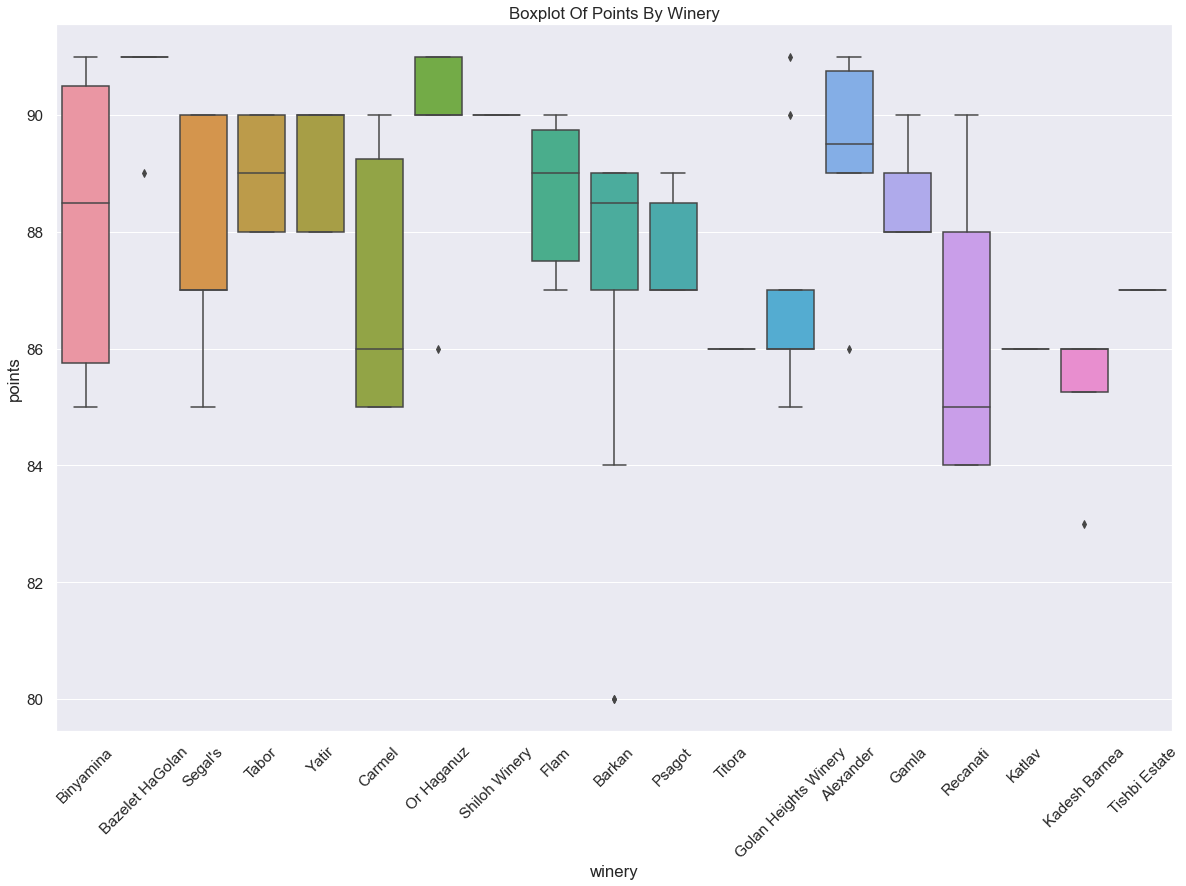

In [14]:
plt.figure(figsize=(20, 13))
sns.boxplot(x='winery', y='points', data=df)
plt.title('boxplot of points by winery'.title())
plt.xticks(rotation=45)

plt.show()

3. Use ANOVA to figure out whether some winaries make better cabernets than others; print the ANOVA table and explain your conclusion

In [15]:
# code credit: lecture 7

variable = 'points'

def ssquares(x):
    return np.sum((x - np.mean(x)) ** 2)

ss_wit = df.groupby('winery')[variable].agg(ssquares).sum()
ss_tot = np.sum((df[variable] -  df[variable].mean()) ** 2)

n = len(df)
k = len(wineries_more_than_1)

ss_bet = ss_tot - ss_wit

MSE_bet = ss_bet / (k-1)
MSE_wit = ss_wit / (n-k)

F = MSE_bet / MSE_wit
f_pval = stats.f.sf(F, k-1, n-k)
print(f"F = {F:.4f}")
print(f"Pvalue = {f_pval:.7f}")


F = 3.3014
Pvalue = 0.0000508


In [16]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Source", "DOF", "SS", "MS", "F", "p_value"]


table.add_row(["Groups", f"{k-1}", f"{ss_bet:.4f}", f"{MSE_bet:.4f}", f"{F:.4f}", f"p_value = {f_pval:7f}"])
table.add_row(["Error", f"{n-k}", f"{ss_wit:.4f}", f"{MSE_wit:.4f}", "", ""])
table.add_row(["Total", f"{n-1}", f"{ss_tot:.4f}", "", "", ""])

print(table)

+--------+-----+----------+---------+--------+--------------------+
| Source | DOF |    SS    |    MS   |   F    |      p_value       |
+--------+-----+----------+---------+--------+--------------------+
| Groups |  18 | 240.8273 | 13.3793 | 3.3014 | p_value = 0.000051 |
| Error  | 116 | 470.1061 |  4.0526 |        |                    |
| Total  | 134 | 710.9333 |         |        |                    |
+--------+-----+----------+---------+--------+--------------------+


4. Find which winaries have cabernets ranked higher than others:
 - Run all paired t-tests; how many of the test's P-values fall below 0.05? is it more than what is expceted if all tests are null?
 

In [17]:
def two_sample_t(data1, data2):
    data1_mean = np.mean(data1)
    data2_mean = np.mean(data2)
    
    n0 = len(data1)
    n1 = len(data2)
    dof = n0 + n1 - 2
    
    s = np.sqrt((np.sum((data1-data1_mean)**2) + np.sum((data2-data2_mean)**2)) / dof)
    
    s = max(EPSILON, s)
    
    t_statistic = (data2_mean - data1_mean) / (s * np.sqrt(1 / n0 + 1 / n1))
    p_val = stats.t.sf(abs(t_statistic), dof)

    return t_statistic, p_val, dof


wineries_pairs = [(winery_1, winery_2) for idx, winery_1 in enumerate(wineries_more_than_1) for winery_2 in wineries_more_than_1[idx + 1: ]]
print(f"There are {len(wineries_pairs)} t-tests to be done")

tests_pvals = list()
for winery_1, winery_2 in wineries_pairs:
    data1 = df[df.winery == winery_1]["points"]
    data2 = df[df.winery == winery_2]["points"]
    
    t_stat, p_val, dof = two_sample_t(data1, data2)

    tests_pvals.append(p_val)


ALPHA = 0.05
p_vals_significant = [p_val for p_val in tests_pvals if p_val < ALPHA / 2] 


print(f"\nThere are {len(p_vals_significant)} out of {len(wineries_pairs)} total p-values that are significantly lower than {ALPHA}")

print(f"\nUnder null hypothisis we expect to reject {len(wineries_pairs) * ALPHA // 1}, and we rejected {len(p_vals_significant)}.")

There are 171 t-tests to be done

There are 59 out of 171 total p-values that are significantly lower than 0.05

Under null hypothisis we expect to reject 8.0, and we rejected 59.


 - Use Bonferroni's method to decide which winaries ranked singnificantly higher than others by reporting on the list of pairs whose P-value is significant after Bonferroni's correction. Also indicate which one is ranked higher out of each pair.

In [18]:
NEW_ALPHA = ALPHA / len(wineries_pairs)

p_vals_significant_new = [p_val for p_val in tests_pvals if p_val < NEW_ALPHA / 2] 

print(f"\nThere are {len(p_vals_significant_new)} out of {len(wineries_pairs)} total p-values that are significantly lower than the new alpha after bonferonni correction: {NEW_ALPHA:.7f}")

print("\nThe following Wineries are significantly greater:\n\n")
for i, p_val in enumerate(tests_pvals):
    
    if p_val > NEW_ALPHA / 2:
        continue
    
    winery_1, winery_2 = wineries_pairs[i]
    
    data1 = df[df.winery == winery_1]["points"]
    data2 = df[df.winery == winery_2]["points"]
    
    data1_mean = np.mean(data1)
    data2_mean = np.mean(data2)
    
    if data1_mean > data2_mean:
        print(f"\n{winery_1}'s mean = {data1_mean:.3f} is significantly higher than {winery_2}'s mean = {data2_mean:.3f} points")
        
    else:
        print(f"\n{winery_2}'s mean = {data2_mean:.3f} is significantly higher than {winery_1}'s mean = {data1_mean:.3f} points")


There are 9 out of 171 total p-values that are significantly lower than the new alpha after bonferonni correction: 0.0002924

The following Wineries are significantly greater:



Bazelet HaGolan's mean = 90.600 is significantly higher than Recanati's mean = 85.941 points

Shiloh Winery's mean = 90.000 is significantly higher than Kadesh Barnea's mean = 85.250 points

Shiloh Winery's mean = 90.000 is significantly higher than Katlav's mean = 86.000 points

Shiloh Winery's mean = 90.000 is significantly higher than Titora's mean = 86.000 points

Shiloh Winery's mean = 90.000 is significantly higher than Tishbi Estate's mean = 87.000 points

Bazelet HaGolan's mean = 90.600 is significantly higher than Kadesh Barnea's mean = 85.250 points

Bazelet HaGolan's mean = 90.600 is significantly higher than Katlav's mean = 86.000 points

Tishbi Estate's mean = 87.000 is significantly higher than Katlav's mean = 86.000 points

Tishbi Estate's mean = 87.000 is significantly higher than Titora's mea